<a href="https://colab.research.google.com/github/Adarshreddyash/A.I/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) #mnist dataset of handwritten digits
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [41]:
X,y=mnist["data"] ,mnist["target"]

X.shape

#y.shape

(70000, 784)

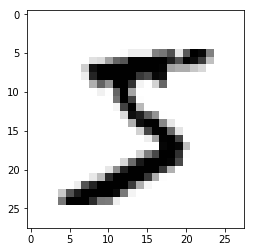

In [42]:
import matplotlib as mpl

import matplotlib.pyplot as plt

import numpy as np

some_digit = X[0]

some_digit_image = some_digit.reshape(28 , 28)

plt.imshow(some_digit_image , cmap= mpl.cm.binary , interpolation="nearest")

plt.axis() # plt.axis("off")  to remove axis
plt.show()

# y[0] integer value
y = y.astype(np.uint8) #casting y values to numbers

In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train5 = (y_train == 5)
y_test5 =  (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , y_train5)

sgd_clf.predict([some_digit]) #checking whether it is 5 or not test it using [X[1]] that must give false


array([ True])

In [47]:
#this section is similar to 
#from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X_train, y_train5, cv=3, scoring="accuracy")


from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3 , random_state= 42)

for train_index , test_index in skfolds.split(X_train , y_train5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train5[train_index]
  X_test_folds = X_train[test_index]
  y_test_folds = y_train5[test_index]
  
  clone_clf.fit(X_train_folds , y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_correct = sum(y_pred == y_test_folds)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [56]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf , X_train ,y_train5 , cv=3)
confusion_matrix(y_train5 , y_train_pred)



array([[53892,   687],
       [ 1891,  3530]])

In [60]:
from sklearn.metrics import precision_score ,recall_score

precision_score(y_train5 , y_train_pred)

0.8370879772350012

In [62]:
recall_score(y_train5 , y_train_pred)

0.6511713705958311